In [4]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle
def load_graph(fn):
    with open(fn, "rb") as f:
        return pickle.load(f)
filenames = [fn for fn in os.listdir("../graphs/") if ".pkl" in fn]
graphs = [load_graph("../graphs/"+fn) for fn in filenames]

In [7]:
g=graphs[0]
g.number_of_edges(), g.number_of_nodes()

(3148, 507)

(array([731., 279.,  70.,  55.,  26.,  52.,   6.,   1.,   2.,   6.]),
 array([  66. ,  643.4, 1220.8, 1798.2, 2375.6, 2953. , 3530.4, 4107.8,
        4685.2, 5262.6, 5840. ]),
 <a list of 10 Patch objects>)

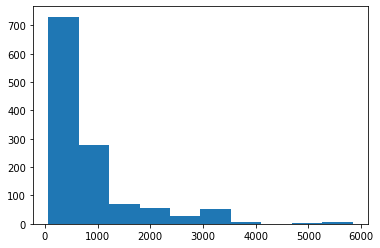

In [8]:
plt.hist([g.number_of_nodes() for g in graphs])

(array([776., 254.,  67.,  45.,  24.,  49.,   4.,   1.,   6.,   2.]),
 array([  295. ,  4718.9,  9142.8, 13566.7, 17990.6, 22414.5, 26838.4,
        31262.3, 35686.2, 40110.1, 44534. ]),
 <a list of 10 Patch objects>)

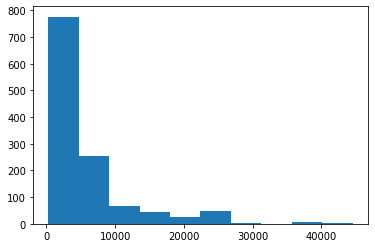

In [9]:
plt.hist([g.number_of_edges() for g in graphs])

Text(0.5, 1.0, 'Degree avg')

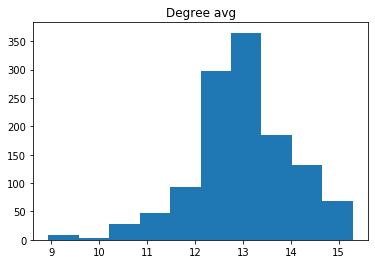

In [10]:
plt.hist([2*g.number_of_edges()/g.number_of_nodes() for g in graphs])
plt.title("Degree avg")

Text(0.5, 1.0, 'Degree centrality')

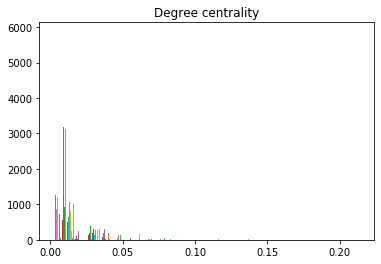

In [16]:
plt.hist([list(nx.degree_centrality(g).values()) for g in graphs])
plt.title("Degree centrality")

Text(0.5, 1.0, 'Eigenvector centrality')

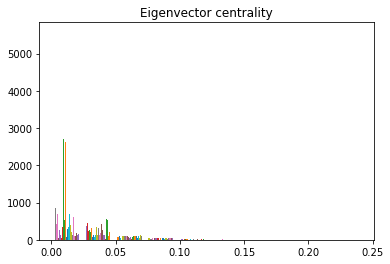

In [19]:
plt.hist([list(nx.eigenvector_centrality_numpy(g).values()) for g in graphs])
plt.title("Eigenvector centrality")

In [28]:
import scipy.sparse as sp
class Laplacian:
    @staticmethod
    def from_adjacency(adj):
        adj = adj + sp.eye(adj.shape[0])
        """Symmetrically normalize adjacency matrix."""
        adj = sp.coo_matrix(adj)
        rowsum = np.array(adj.sum(1))
        d_inv_sqrt = np.power(rowsum, -0.5).flatten()
        d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
        d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
        return adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).todense()

In [29]:
eigval = []
for g in graphs: 
    L = Laplacian.from_adjacency(nx.adjacency_matrix(g))
    w,v = np.linalg.eig(L)
    eigval.extend(w)

(array([1.58000e+02, 6.85880e+04, 2.68688e+05, 2.88671e+05, 1.93940e+05,
        9.28780e+04, 5.56120e+04, 3.57230e+04, 2.32310e+04, 1.53160e+04]),
 array([-0.6408819 , -0.47679371, -0.31270552, -0.14861733,  0.01547086,
         0.17955905,  0.34364724,  0.50773543,  0.67182362,  0.83591181,
         1.        ]),
 <a list of 10 Patch objects>)

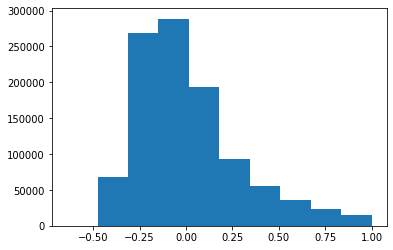

In [30]:
plt.hist(eigval)